In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_csv("FINAL_FROM_DF.csv")

In [3]:
df_cipla=df[df.SYMBOL=='CIPLA']

In [4]:
df_cipla

,SYMBOL,SERIES,OPEN,HIGH,LOW,CLOSE,LAST,PREVCLOSE,TOTTRDQTY,TOTTRDVAL,TIMESTAMP,TOTALTRADES,ISIN
271,CIPLA,EQ,535.40,538.65,531.00,536.85,536.65,534.65,601643,3.219501e+08,2017-06-28,21918,INE059A01026
2033,CIPLA,EQ,616.00,621.70,609.80,611.80,613.20,614.80,1486189,9.151070e+08,2017-11-28,17972,INE059A01026
3836,CIPLA,EQ,587.70,592.80,582.60,583.70,583.80,585.25,749802,4.390960e+08,2017-02-28,20865,INE059A01026
5568,CIPLA,EQ,561.95,561.95,555.00,557.45,556.10,561.70,865584,4.822062e+08,2017-04-28,14317,INE059A01026
7316,CIPLA,EQ,597.50,601.50,593.45,596.30,596.15,597.30,1027093,6.137873e+08,2017-03-20,14301,INE059A01026
...,...,...,...,...,...,...,...,...,...,...,...,...,...
838246,CIPLA,EQ,471.85,474.00,468.00,472.15,473.00,468.35,811331,3.825841e+08,2016-06-08,21921,INE059A01026
839881,CIPLA,EQ,538.60,539.00,522.00,525.05,524.90,537.60,2961527,1.568175e+09,2016-03-15,26214,INE059A01026
841505,CIPLA,EQ,509.80,510.60,503.25,504.45,505.00,506.40,1262329,6.393278e+08,2016-04-08,21226,INE059A01026
843129,CIPLA,EQ,609.00,617.80,604.70,611.55,611.05,609.10,1225528,7.515773e+08,2016-09-23,33395,INE059A01026


In [5]:
df_cipla['TIMESTAMP']=pd.to_datetime(df_cipla['TIMESTAMP'])

<ipython-input-5-3b7768048105>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cipla['TIMESTAMP']=pd.to_datetime(df_cipla['TIMESTAMP'])


In [6]:
df_cipla = df_cipla.sort_values(by='TIMESTAMP')

In [7]:
df_cipla['ts']=df_cipla['TIMESTAMP']

In [8]:
df_cipla=df_cipla.set_index('ts')

In [9]:
df_cipla = df_cipla.resample('D').ffill()

In [10]:
df_cipla['TIMESTAMP']=df_cipla.index

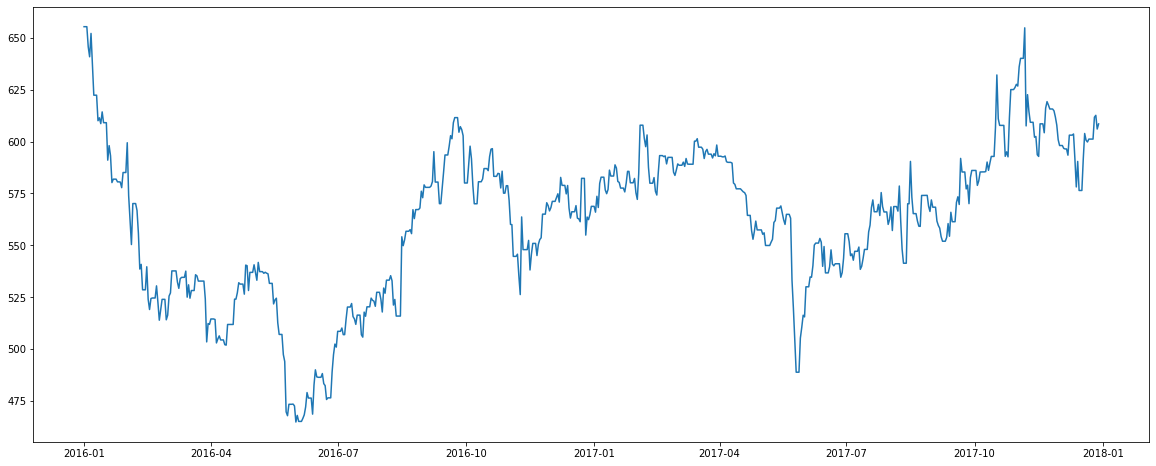

In [11]:
plt.figure(figsize=(20,8))
plt.plot(df_cipla['TIMESTAMP'], df_cipla['CLOSE'])
plt.show()

In [12]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

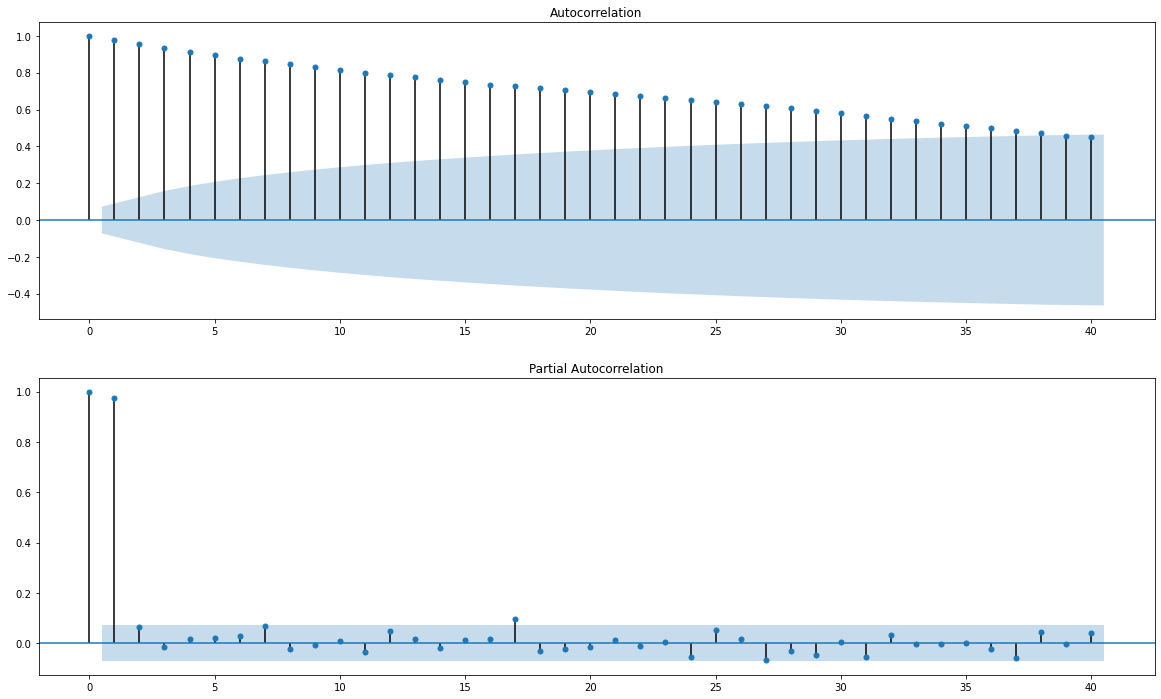

In [13]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_cipla['CLOSE'].iloc[1:], lags=40, ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_cipla['CLOSE'].iloc[1:], lags=40, ax = ax2)

In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scalerx = MinMaxScaler()
scalery = MinMaxScaler()

In [16]:
cipla_stk=df_cipla[['CLOSE']]

In [17]:
cipla_stk

,CLOSE
ts,
2016-01-01,655.35
2016-01-02,655.35
2016-01-03,655.35
2016-01-04,645.65
2016-01-05,640.85
...,...
2017-12-25,601.20
2017-12-26,611.75
2017-12-27,612.65


In [18]:
cipla_stk['CLOSE'].shift(-1)

ts
2016-01-01    655.35
2016-01-02    655.35
2016-01-03    645.65
2016-01-04    640.85
2016-01-05    652.10
               ...  
2017-12-25    611.75
2017-12-26    612.65
2017-12-27    606.05
2017-12-28    608.50
2017-12-29       NaN
Freq: D, Name: CLOSE, Length: 729, dtype: float64

In [19]:
cpl_prep = pd.DataFrame()

In [20]:
#The Output of each TimeStamp is price of the next day
cpl_prep['yt+1'] = cipla_stk['CLOSE'].shift(-1)

In [21]:
cpl_prep.index = cipla_stk.index

In [22]:
cpl_prep

,yt+1
ts,
2016-01-01,655.35
2016-01-02,655.35
2016-01-03,645.65
2016-01-04,640.85
2016-01-05,652.10
...,...
2017-12-25,611.75
2017-12-26,612.65
2017-12-27,606.05


In [23]:
T=200
HORIZON = 1
for t in range(1, T+1):
    cpl_prep['x_'+str(T-t)]=cipla_stk['CLOSE'].shift((T-t))

In [24]:
cpl_prep

,yt+1,x_199,x_198,x_197,x_196,x_195,x_194,x_193,x_192,x_191,...,x_9,x_8,x_7,x_6,x_5,x_4,x_3,x_2,x_1,x_0
ts,,,,,,,,,,,,,,,,,,,,,
2016-01-01,655.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655.35
2016-01-02,655.35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655.35,655.35
2016-01-03,645.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,655.35,655.35,655.35
2016-01-04,640.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,655.35,655.35,655.35,645.65
2016-01-05,652.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,655.35,655.35,655.35,645.65,640.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-25,611.75,551.10,551.10,551.10,553.35,551.55,539.90,549.45,536.75,536.75,...,576.45,576.45,591.65,603.90,600.65,599.80,601.20,601.20,601.20,601.20
2017-12-26,612.65,551.10,551.10,553.35,551.55,539.90,549.45,536.75,536.75,536.75,...,576.45,591.65,603.90,600.65,599.80,601.20,601.20,601.20,601.20,611.75
2017-12-27,606.05,551.10,553.35,551.55,539.90,549.45,536.75,536.75,536.75,539.75,...,591.65,603.90,600.65,599.80,601.20,601.20,601.20,601.20,611.75,612.65


In [25]:
cpl_prep = cpl_prep.dropna(how='any')

In [26]:
cpl_prep

,yt+1,x_199,x_198,x_197,x_196,x_195,x_194,x_193,x_192,x_191,...,x_9,x_8,x_7,x_6,x_5,x_4,x_3,x_2,x_1,x_0
ts,,,,,,,,,,,,,,,,,,,,,
2016-07-18,505.80,655.35,655.35,655.35,645.65,640.85,652.10,637.45,622.35,622.35,...,520.30,520.30,522.00,515.70,514.60,511.95,516.40,516.40,516.40,506.95
2016-07-19,517.85,655.35,655.35,645.65,640.85,652.10,637.45,622.35,622.35,622.35,...,520.30,522.00,515.70,514.60,511.95,516.40,516.40,516.40,506.95,505.80
2016-07-20,515.85,655.35,645.65,640.85,652.10,637.45,622.35,622.35,622.35,610.05,...,522.00,515.70,514.60,511.95,516.40,516.40,516.40,506.95,505.80,517.85
2016-07-21,520.40,645.65,640.85,652.10,637.45,622.35,622.35,622.35,610.05,611.45,...,515.70,514.60,511.95,516.40,516.40,516.40,506.95,505.80,517.85,515.85
2016-07-22,520.40,640.85,652.10,637.45,622.35,622.35,622.35,610.05,611.45,608.65,...,514.60,511.95,516.40,516.40,516.40,506.95,505.80,517.85,515.85,520.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-24,601.20,550.15,551.10,551.10,551.10,553.35,551.55,539.90,549.45,536.75,...,576.45,576.45,576.45,591.65,603.90,600.65,599.80,601.20,601.20,601.20
2017-12-25,611.75,551.10,551.10,551.10,553.35,551.55,539.90,549.45,536.75,536.75,...,576.45,576.45,591.65,603.90,600.65,599.80,601.20,601.20,601.20,601.20
2017-12-26,612.65,551.10,551.10,553.35,551.55,539.90,549.45,536.75,536.75,536.75,...,576.45,591.65,603.90,600.65,599.80,601.20,601.20,601.20,601.20,611.75


In [27]:
cpl_prep.shape[0]

529

In [28]:
cpl_prep_vld = cpl_prep.tail(200)

In [29]:
cpl_prep_trn = cpl_prep.drop(cpl_prep.tail(200).index)

In [30]:
cols=cpl_prep_vld.columns

In [31]:
y_train = pd.DataFrame(cpl_prep_trn['yt+1'])
y_valid = pd.DataFrame(cpl_prep_vld['yt+1'])


In [32]:
x_train=cpl_prep_trn.drop(columns=['yt+1'])
x_valid=cpl_prep_vld.drop(columns=['yt+1'])

In [33]:
x_train = pd.DataFrame(scalerx.fit_transform(x_train), index=x_train.index, columns=x_train.columns)
x_valid = pd.DataFrame(scalerx.fit_transform(x_valid), index=x_valid.index, columns=x_valid.columns)

y_train = pd.DataFrame(scalery.fit_transform(y_train.values.reshape(-1, 1)), index=y_train.index, columns=y_train.columns)
y_valid = pd.DataFrame(scalery.fit_transform(y_valid.values.reshape(-1, 1)), index=y_valid.index, columns=y_valid.columns)

In [34]:
test_indx=list(y_valid.index)

In [35]:
x_train_array = x_train.values
y_train_array = y_train.values

In [36]:
x_valid_array = x_valid.values
y_valid_array = y_valid.values

In [37]:
x_train_array = x_train_array.reshape(x_train_array.shape[0], T, 1)


In [38]:
x_valid_array = x_valid_array.reshape(x_valid_array.shape[0], T, 1)

In [39]:
import tensorflow as tf

In [40]:
from tensorflow.keras import models


In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [42]:
from tensorflow.keras.layers import GRU, LSTM
from tensorflow.keras.layers import Dense

In [43]:
UNITS = 30
BATCH_SIZE = 32
EPOCHS=50



model = Sequential()
model.add(GRU(UNITS, return_sequences=True,input_shape=(T,1)))
model.add(GRU(UNITS))
model.add(Dense(HORIZON))

In [44]:
model.compile(optimizer='RMSprop', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 200, 30)           2970      
_________________________________________________________________
gru_1 (GRU)                  (None, 30)                5580      
_________________________________________________________________
dense (Dense)                (None, 1)                 31        
Total params: 8,581
Trainable params: 8,581
Non-trainable params: 0
_________________________________________________________________


In [45]:
GRU_early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=5)

In [46]:
model_history = model.fit(x_train_array, y_train_array,
                         batch_size=BATCH_SIZE,
                         epochs=EPOCHS,
                         validation_data=(x_valid_array, y_valid_array),
                         callbacks=[GRU_early_stop],
                         verbose=1)

Epoch 1/50
11/11 [==============================] - 4s 320ms/step - loss: 0.0447 - val_loss: 0.0176
Epoch 2/50
11/11 [==============================] - 3s 250ms/step - loss: 0.0096 - val_loss: 0.0149
Epoch 3/50
11/11 [==============================] - 3s 247ms/step - loss: 0.0084 - val_loss: 0.0144
Epoch 4/50
11/11 [==============================] - 3s 247ms/step - loss: 0.0098 - val_loss: 0.0149
Epoch 5/50
11/11 [==============================] - 3s 246ms/step - loss: 0.0082 - val_loss: 0.0089
Epoch 6/50
11/11 [==============================] - 3s 289ms/step - loss: 0.0076 - val_loss: 0.0088
Epoch 7/50
11/11 [==============================] - 3s 275ms/step - loss: 0.0084 - val_loss: 0.0071
Epoch 8/50
11/11 [==============================] - 3s 242ms/step - loss: 0.0062 - val_loss: 0.0080
Epoch 9/50
11/11 [==============================] - 3s 244ms/step - loss: 0.0073 - val_loss: 0.0070
Epoch 10/50
11/11 [==============================] - 3s 247ms/step - loss: 0.0065 - val_loss: 0.0082

In [47]:
ts_predictions = model.predict(x_valid_array)
ts_predictions.shape

(200, 1)

In [48]:
#x_valid_array

In [49]:
#x_valid_array[0][:]

In [50]:
test_index=list(y_valid.index)

In [51]:
predictions = scalery.inverse_transform(ts_predictions)
real = scalery.inverse_transform(y_valid_array)

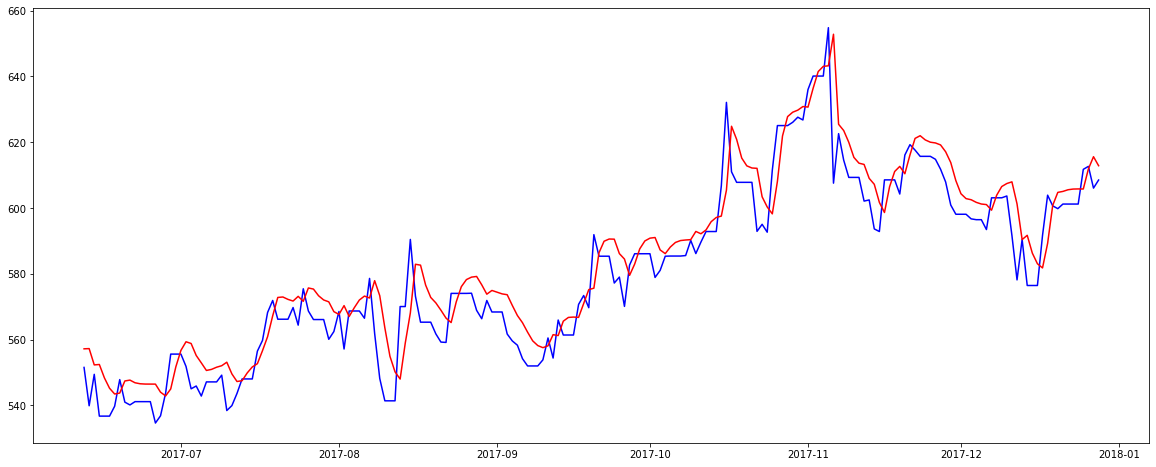

In [52]:
plt.figure(figsize=(20,8))
plt.plot(test_index,real, 'b')
plt.plot(test_index,predictions, 'r')
plt.show()

In [53]:
import math
from sklearn.metrics import mean_squared_error
MSE=math.sqrt(mean_squared_error(real,predictions))
print(MSE)

9.255408288738687
